# Example of optimizing a convex function

In [1]:
from mango.tuner import Tuner
from scipy.stats import uniform

In [2]:

param_dict = {
    'x': uniform(-5, 10),
    'y': uniform(-5, 10),
}

    
def objfunc(args_list):
    hyper_evaluated = []
    objective_evaluated = []
    for hyper_par in args_list:
        x = hyper_par['x']
        y = hyper_par['y']
        objective = -(x**2 + y**2)
        objective_evaluated.append(objective)
        hyper_evaluated.append(hyper_par)
    return hyper_evaluated, objective_evaluated

In [3]:
conf_Dict = dict()
conf_Dict['batch_size'] = 10
conf_Dict['num_iteration'] = 10
conf_Dict['domain_size'] = 10000
conf_Dict['initial_random']=5

In [4]:
tuner = Tuner(param_dict, objfunc,conf_Dict)
print('Tuner Configuration')
print(tuner.getConf())

Tuner Configuration
{'param_dict': {'x': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1d230128>, 'y': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1d2305f8>}, 'userObjective': <function objfunc at 0x1a1d221620>, 'domain_size': 10000, 'initial_random': 5, 'num_iteration': 10, 'objective': 'maximize', 'batch_size': 10}


In [5]:
results = tuner.maximize()

In [6]:
print('best parameters:',results['best_params'])
print('best objective:',results['best_objective'])

best parameters: {'x': 0.02829121530498835, 'y': 0.029070447575238134}
best objective: -0.0016454837856578757


In [7]:
# Actual Opt Values
x_opt = 0
y_opt = 0

In [8]:
print("Real x_opt and y_opt are:",x_opt,y_opt)

Real x_opt and y_opt are: 0 0


# Actual variation in the objective

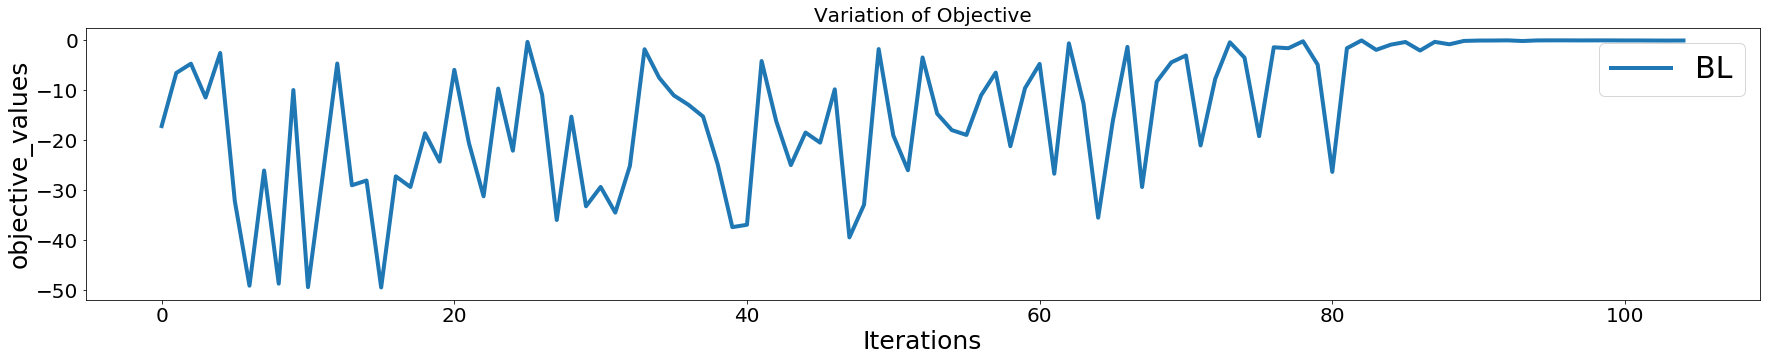

In [10]:
Size = 2000

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# Plotting the variation in the max objective

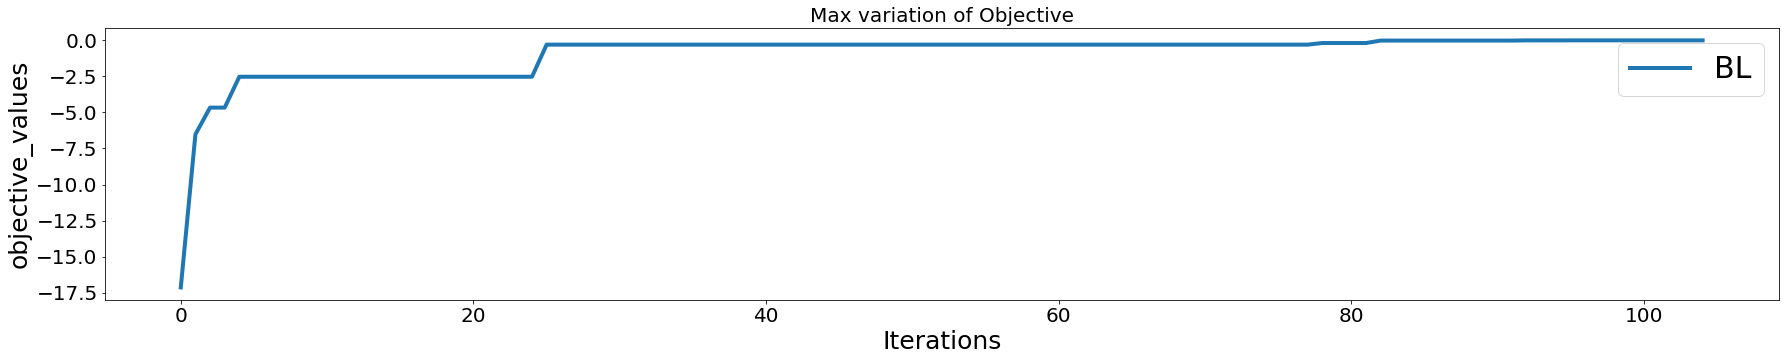

In [11]:
Size = 201 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# See the entire results

In [12]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

{   'best_objective': -0.0016454837856578757,
    'best_params': {'x': 0.02829121530498835, 'y': 0.029070447575238134},
    'objective_values': [   -17.13983560554954,
                            -6.519178554658764,
                            -4.666187790225656,
                            -11.429902855108027,
                            -2.5266677938459283,
                            -32.153028970905154,
                            -49.05221263242124,
                            -26.025264064469916,
                            -48.6426674583668,
                            -9.933080083586045,
                            -49.34321897332619,
                            -27.189619824408666,
                            -4.635275801666987,
                            -28.97788565285104,
                            -28.023858946481752,
                            -49.40350754965334,
                            -27.18948583549887,
                            -29.318709213474477,
          

# See the values tried

In [13]:
XY=[]
for par in results['params_tried']:
    x = par['x']
    y = par['y']
    XY.append([x,y])

In [14]:
XY= np.array(XY)

In [15]:
print(XY)

[[ 2.47000962e+00 -2.43167180e+00]
 [ 3.23731215e+00 -1.57817642e+00]
 [-3.21905378e-01 -2.87110362e+00]
 [-3.38908216e+00  3.86112665e+00]
 [ 1.14297490e+00 -3.96654360e+00]
 [-1.51186336e+00 -3.03139594e+00]
 [ 5.07457674e-01 -2.00204252e+00]
 [-9.18635472e-01 -1.80842867e+00]
 [-2.14497963e-01 -4.06312010e+00]
 [ 3.68979881e+00 -2.80972234e+00]
 [ 2.02979600e+00 -1.25109808e+00]
 [ 2.61705500e+00 -3.67601164e+00]
 [ 4.33926529e+00 -9.26332172e-01]
 [ 3.12861940e+00 -2.57096742e-01]
 [-1.49241232e+00  8.92885945e-01]
 [ 4.94127366e+00  4.99423747e+00]
 [ 7.57589683e-01  4.95002697e+00]
 [-4.95986349e+00 -4.97871442e+00]
 [-4.98523537e+00 -5.90961509e-01]
 [ 2.82913614e+00  2.71936773e+00]
 [ 4.96523435e+00 -4.89106371e+00]
 [-4.97523509e+00  1.90933587e+00]
 [ 4.93985752e+00  1.66911271e+00]
 [ 3.22327434e-01  2.35536473e+00]
 [-4.00284539e+00 -2.74721999e+00]
 [-4.98940048e+00  4.89856230e+00]
 [-1.55225753e+00  4.99417641e+00]
 [-2.71263564e+00 -4.98480361e+00]
 [ 2.97031579e+00  4

In [16]:
print(np.sort(XY,axis=0))

[[-4.93244656e+00 -4.98891646e+00]
 [-4.92538527e+00 -4.98723836e+00]
 [-4.92358028e+00 -4.83334781e+00]
 [-3.91149211e+00 -4.62203746e+00]
 [-3.49273269e+00 -2.60034768e+00]
 [-2.68973497e+00 -2.39059590e+00]
 [-2.11429711e+00 -2.16902201e+00]
 [-1.74464166e+00 -1.87479450e+00]
 [-7.63457341e-01 -1.36690488e+00]
 [-6.73214369e-01 -1.93158942e-01]
 [-5.18000551e-01 -1.69588219e-01]
 [-1.91573938e-01 -1.57561378e-01]
 [-1.67494748e-01 -1.54070702e-01]
 [-1.57446118e-01 -1.47318666e-01]
 [-1.48062259e-01 -1.40766076e-01]
 [-1.42222618e-01 -1.39972752e-01]
 [-1.35792581e-01 -1.29401024e-01]
 [-1.09623182e-01 -1.27399988e-01]
 [-1.09568084e-01 -1.07607055e-01]
 [-9.34924750e-02 -1.02842252e-01]
 [-8.72432940e-02 -1.00498033e-01]
 [-7.75593919e-02 -8.54031879e-02]
 [-7.51600182e-02 -7.03845539e-02]
 [-7.22951004e-02 -6.62801477e-02]
 [-6.10580278e-02 -5.57847559e-02]
 [-5.27146696e-02 -4.87348240e-02]
 [-4.37893541e-02 -4.73455893e-02]
 [-4.22566499e-02 -4.14664689e-02]
 [-4.08950903e-02 -3

In [17]:
XY.shape

(101, 2)